Problem: You work as a data scientist for Instagram. They want to predict the number of hours a user will spend on the site on an average day. They give you a labeled data sample of 10,000 users and 200 different variables to generate your model. You create a model that performs very well on the training data, but there is a big dip in your performance on the test set.  What is the issue and what should you do? Be specific in your solutions.

# Ridge and Lasso Regression

## SWBAT Implement a regularize regression model to help improve the performance of their model on a test set of data.

### Key Questions:

* When should you use a regularized model instead of a normal model?

* How do regularized models differ from normal linear regression?

* How does a Ridge model differ from a Lasso Model?

## Recap of Overfiting a model

![alt text](bias-variance-train-test-error.png)

#### Two common (and somewhat related) ways to think of model complexity:

1. Model complexity as a function of the total number of features with nonzero weights. 

*The more features the more complex the model.*

2. Model complexity as a function of the weights of all the features in the model. 

*The bigger the weights of the features (coefficients) the more complex the model.*


#### How does model complexity change with coefficients?

Recall the way we interpret a regression model $Y = mx + b$: 

With every unit increase in x, the outcome y increase by m unit. Therefore, the bigger the coefficient m is, the more the outcome is subjected to changes in predictor x.

### Cost Function

A cost function is a measure of how good or bad the model is at estimating the relationship of our X and y variables. Usually, it is expressed in the difference between actual values and predicted values. When fitting a model to data, the model finds the coeeficients that will minimize the cost fuction. 

For simple linear regression, the cost function is represented as:
<center> $$ \text{cost_function}= \sum_{i=1}^n(y_i - \hat{y})^2 = \sum_{i=1}^n(y_i - (mx_i + b))^2$$
    
    
For linear regression with multiple predictors, the cost function is expressed as:
$$ \text{cost_function}= \sum_{i=1}^n(y_i - \hat{y})^2 = \sum_{i=1}^n(y_i - \sum_{j=1}^k(m_jx_{ij} + b))^2$$

Where k stands for number of predictors at jth term.

## Ridge Rgression (L2 Norm)

The ridge regression applies a penalizing parameter $\lambda$ *slope* $^2$, such that a small bias will be introduced to the entire model depending on the value of $\lambda$, which is called a **hyperparameter**. 

$$ \text{Ridge Cost Function}= \sum_{i=1}^n(y_i - \hat{y})^2 = \sum_{i=1}^n(y_i - \sum_{j=1}^k(m_jx_{ij} + b))^2 + \lambda \sum_{j=1}^p m_j^2$$

The ridge regression penalty term contains all of the coefficients squared from the original regression line except for the intercept term. 

Applying such a penalizing parameter to the cost function, the regression model will now try to minimize the combination of both the residual sum of squares **and** the term $\lambda \sum_{j=1}^p m_j^2$. 

Ridge regression works by reducing the magnitude of the coefficient m and therefore reducing the effect the predictors have on the outcome. 




**Ridge regression shrinks the coefficients and it helps to reduce the model complexity**

## Lasso Regression (L1 Norm)
Lasso regression is very similar to Ridge regression except for one difference - the penalty term is not squared but the absolute values of the coefficients muliplied by lambda, expressed by:

$$ \text{cost_function_lasso}= \sum_{i=1}^n(y_i - \hat{y})^2 = \sum_{i=1}^n(y_i - \sum_{j=1}^k(m_jx_{ij} + b))^2 + \lambda \sum_{j=1}^p \mid m_j \mid$$

The biggest difference in Ridge and Lasso is that Lasso simultaneously performs variable selection: some coefficients are shrunk to 0, rendering them nonexistence in the original regression model. Therefore, Lasso regression performs very well when you have higher dimensional dataset where some predictors are useless; whereas Ridge works best when all the predictors are needed. 

### Hyperparameter tuning

A model **hyperparameter** is a configuration that is external to the model and whose value cannot be estimated from data.


- They are often used in processes to help estimate model parameters.
- They are often specified by the practitioner.
- They can often be set using heuristics.
- They are often tuned for a given predictive modeling problem.

### Choosing the approriate $\lambda$

When choosing a lambda value, the goal is to strike the right balance between simplicity and training-data fit:

* If your lambda value is too high, your model will be simple, but you run the risk of underfitting your data. Your model won't learn enough about the training data to make useful predictions.

* If your lambda value is too low, your model will be more complex, and you run the risk of overfitting your data. Your model will learn too much about the particularities of the training data, and won't be able to generalize to new data.

In [33]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import matplotlib
matplotlib.rcParams.update({'font.size': 14})
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn import metrics

### Import our data 

In [37]:
df = pd.read_csv('kc_house_data.csv',index_col='id')
df['yr_old']=2017 - df['yr_built']

target = df.price
features = df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'condition', 'grade',
       'sqft_basement', 'yr_old']]

### Create Test Train Split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=34,test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(17290, 10) (17290,)
(4323, 10) (4323,)


In [9]:
lm = LinearRegression()
lm.fit(X_train,y_train)
y_train_pred = lm.predict(X_train)

In [10]:
train_mae = metrics.mean_absolute_error(y_train, y_train_pred)
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))

print('Mean Absolute Error:' + str(metrics.mean_absolute_error(y_train, y_train_pred)))
print('Mean Squared Error:' + str(metrics.mean_squared_error(y_train, y_train_pred)))
print('Root Mean Squared Error:' + str(np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))))

Mean Absolute Error:139254.18635103217
Mean Squared Error:44430411828.45894
Root Mean Squared Error:210785.2267794376


In [11]:
y_pred = lm.predict(X_test)

test_mae = metrics.mean_absolute_error(y_test, y_pred)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:' + str(metrics.mean_absolute_error(y_test, y_pred)))
print('Mean Squared Error:' + str(metrics.mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Error:' + str(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))


Mean Absolute Error:143715.20044422447
Mean Squared Error:61547797042.71289
Root Mean Squared Error:248088.2847752245


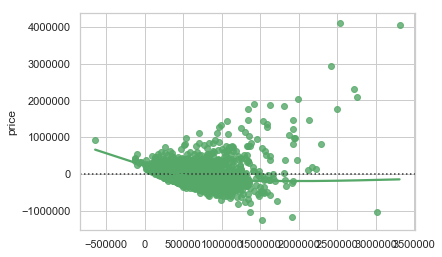

In [14]:
import seaborn as sns
sns.set(style="whitegrid")

#residual plot

sns.residplot(y_pred, y_test, lowess=True, color="g")

In [16]:
lm.coef_

array([-3.63326362e+04,  4.09074273e+04,  1.58641566e+02, -1.70273290e-01,
        3.31287511e+04,  7.03080720e+05,  1.94965639e+04,  1.33594891e+05,
        2.14901209e+01,  3.69198897e+03])

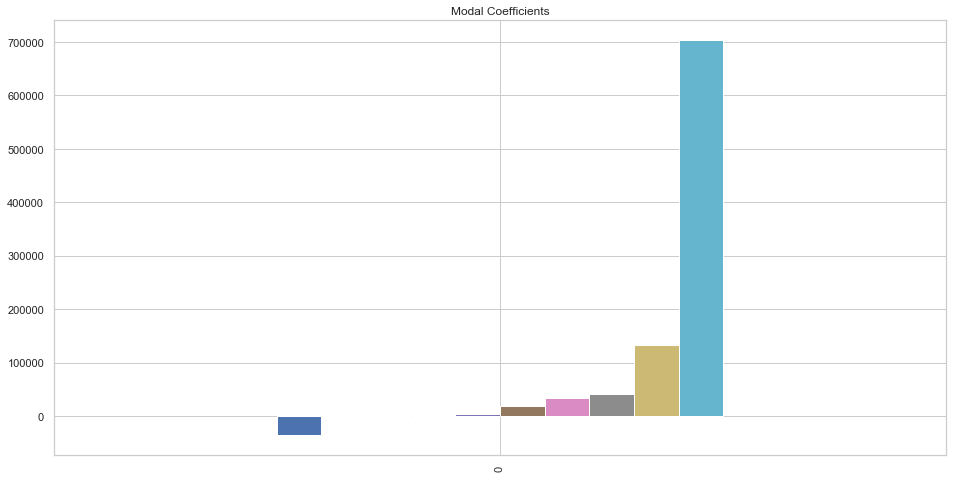

In [28]:
coef = pd.DataFrame(data=lm.coef_ ).T
coef.columns = X_test.columns

model_coef = coef.T.sort_values(by=0).T
model_coef.plot(kind='bar', title='Modal Coefficients', legend=False, figsize=(16,8))

In [39]:
model_coef

,bedrooms,sqft_lot,sqft_basement,sqft_living,yr_old,condition,floors,bathrooms,grade,waterfront
0,-36332.636198,-0.170273,21.490121,158.641566,3691.988973,19496.563904,33128.751129,40907.427313,133594.890538,703080.720247


In [40]:
from sklearn.preprocessing import PolynomialFeatures

poly_2 = PolynomialFeatures(degree=2)
poly_2.fit_transform(features)
df_poly_2= pd.DataFrame(poly_2.transform(features), columns=poly_2.get_feature_names(features.columns))


X_train2, X_test2, y_train2, y_test2 = train_test_split(df_poly_2, target, random_state=34,test_size=0.2)
# print(X_train2.shape, y_train2.shape)
# print(X_test2.shape, y_test2.shape)

lm2 = LinearRegression()
model2 = lm2.fit(X_train2, y_train2)
y_train_pred2 = lm2.predict(X_train2)

train2_mae = metrics.mean_absolute_error(y_train2, y_train_pred2)



y_pred2 = lm2.predict(X_test2)

test_rmse2 = np.sqrt(metrics.mean_squared_error(y_test2, y_pred2))

test2_mae = metrics.mean_absolute_error(y_test2, y_pred2)

print(train_rmse2, test_rmse2)


127584.06003076711 130097.93086286107


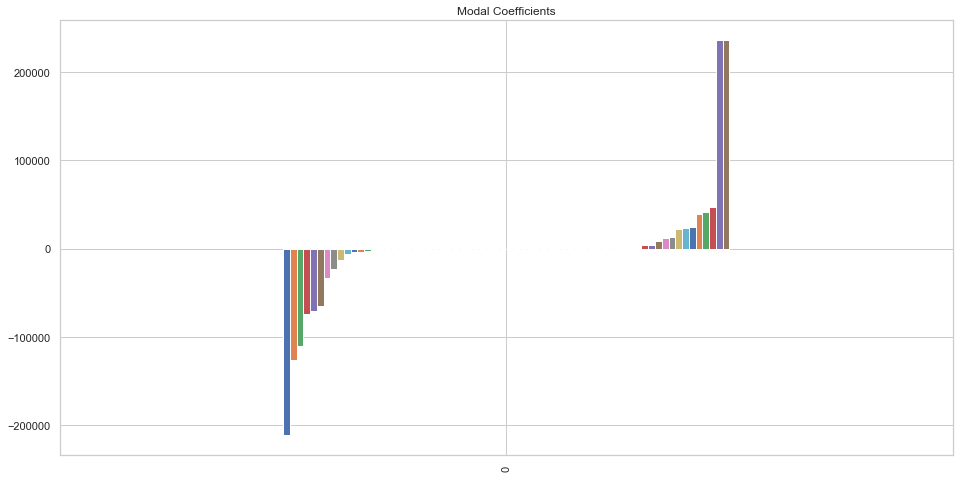

In [35]:
coef2 = pd.DataFrame(data=lm2.coef_ ).T
coef2.columns = X_test2.columns

model_coef2 = coef2.T.sort_values(by=0).T
model_coef2.plot(kind='bar', title='Modal Coefficients', legend=False, figsize=(16,8))

In [36]:
model_coef2

,grade,floors waterfront,floors,condition,bathrooms,waterfront grade,bedrooms,bathrooms floors,bathrooms^2,yr_old,...,grade^2,bedrooms bathrooms,floors condition,bathrooms grade,bathrooms waterfront,bedrooms waterfront,floors^2,waterfront condition,waterfront^2,waterfront
0,-211633.107229,-126606.527903,-110525.549668,-73541.69064,-70735.655144,-64779.854697,-33753.387413,-22697.270079,-13489.584264,-6308.723586,...,11679.0101,12910.694835,22300.752834,22992.270465,24355.530635,39551.123623,41855.942154,47344.062874,236199.959829,236200.234781


In [17]:
coef = pd.DataFrame(data=lm.coef_.T, columns=X_train.columns )

model_coef = coef.T.sort_values(by=0).T

model_coef.plot(kind='bar', title='Modal Coefficients', legend=False, figsize=(16,8))

ValueError: Shape of passed values is (10, 1), indices imply (10, 10)

MSE: 3058.6648889297144
RMSE: 55.30519766649166
0.7708879488649979


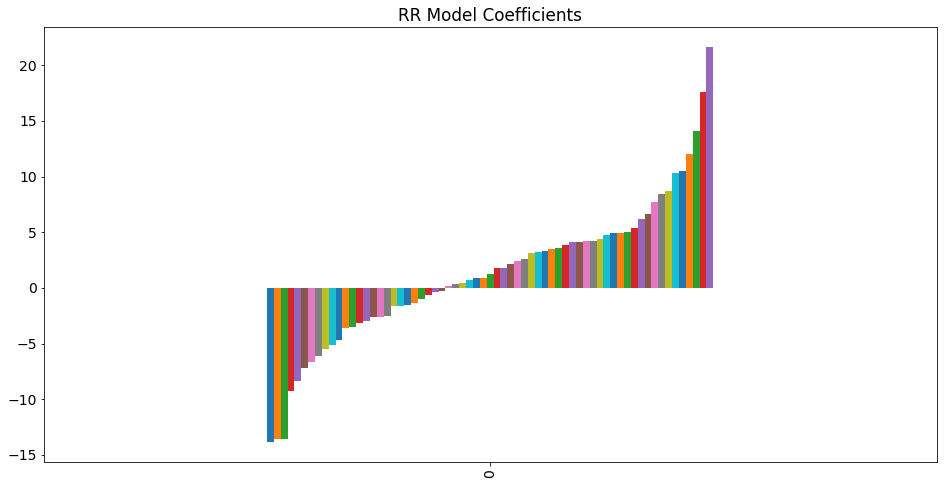

In [74]:
## training the model

ridgeReg = Ridge(alpha=0.05, normalize=True)

ridgeReg.fit(X_train,y_train)

y_pred = ridgeReg.predict(X_test)

#calculating mse

print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred))/ y_test.outcome.std())
coef = pd.DataFrame(data=ridgeReg.coef_, columns=X_train.columns )

model_coef = coef.T.sort_values(by=0).T

model_coef.plot(kind='bar', title='RR Model Coefficients', legend=False, figsize=(16,8))

MSE: 2824.605652444171
RMSE: 53.147019224451064
0.7408055366746995


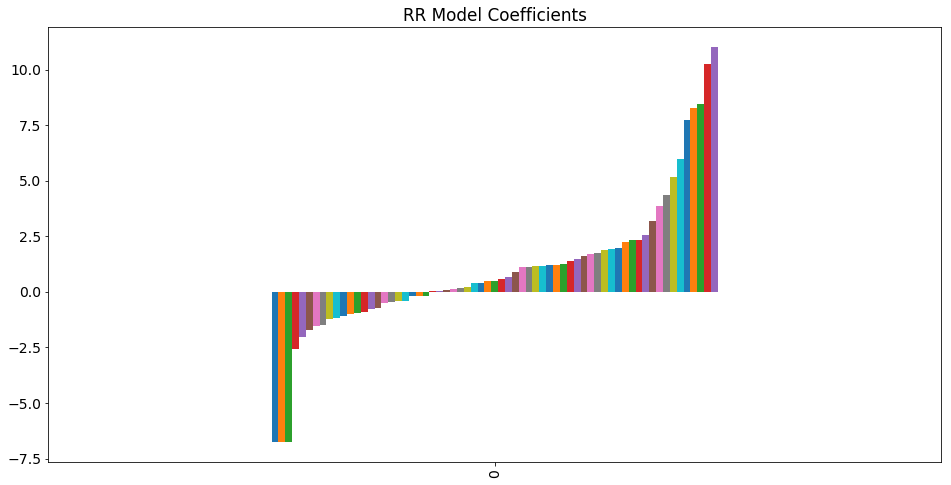

In [75]:
## training the model

ridgeReg = Ridge(alpha=1, normalize=True)

ridgeReg.fit(X_train,y_train)

y_pred = ridgeReg.predict(X_test)

#calculating mse

print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred))/ y_test.outcome.std())
coef = pd.DataFrame(data=ridgeReg.coef_, columns=X_train.columns )

model_coef = coef.T.sort_values(by=0).T

model_coef.plot(kind='bar', title='RR Model Coefficients', legend=False, figsize=(16,8))

MSE: 3749.939393641962
RMSE: 61.23674871873883
0.853566637617344


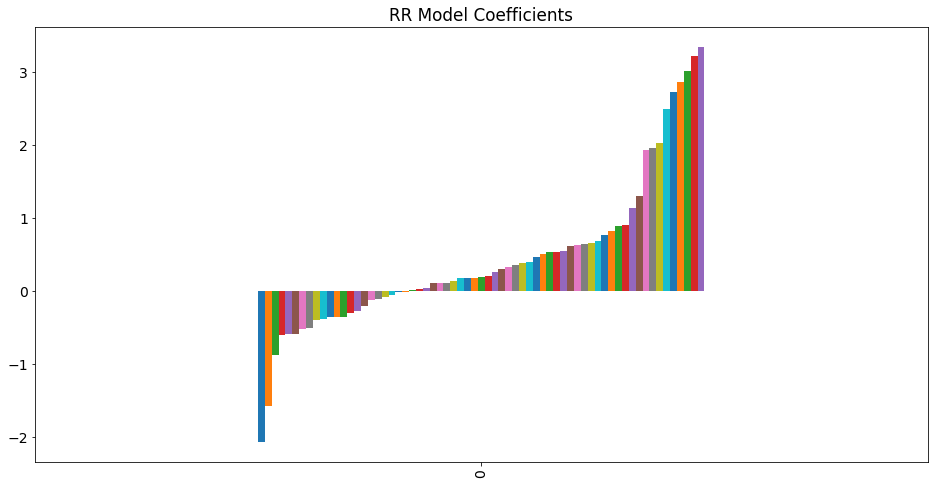

In [80]:
## training the model

ridgeReg = Ridge(alpha=10, normalize=True)

ridgeReg.fit(X_train,y_train)

y_pred = ridgeReg.predict(X_test)

#calculating mse

print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred))/ y_test.outcome.std())
coef = pd.DataFrame(data=ridgeReg.coef_, columns=X_train.columns )

model_coef = coef.T.sort_values(by=0).T

model_coef.plot(kind='bar', title='RR Model Coefficients', legend=False, figsize=(16,8))

**Important Points:**
* It shrinks the parameters, therefore it is mostly used to prevent multicollinearity.
* It reduces the model complexity by coefficient shrinkage.
* It uses L2 regularization technique.


**Lasso regression not only helps in reducing over-fitting but it can help us in feature selection.**

MSE: 2832.5482144218554
RMSE: 53.22168932326233
0.7418463480584917


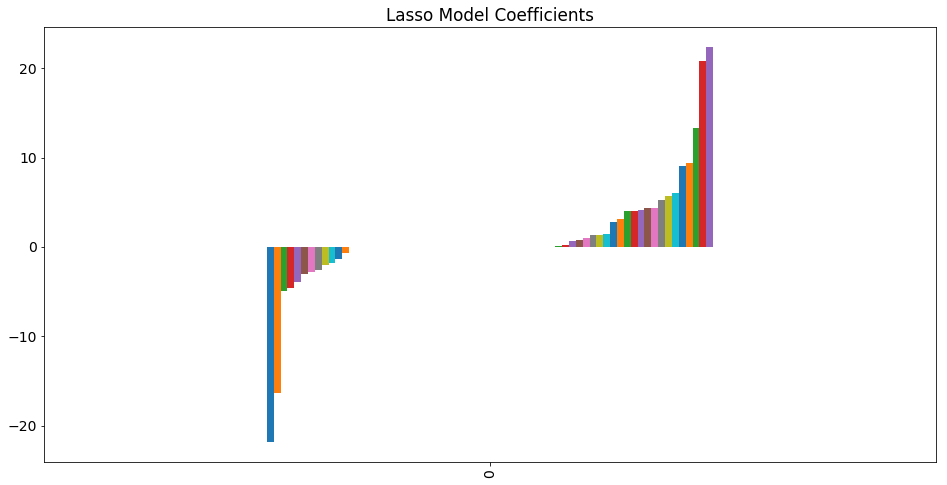

In [86]:
## training the model
from sklearn.linear_model import Lasso


lassoReg = Lasso(alpha=0.05, normalize=True)

lassoReg.fit(X_train,y_train)

y_pred = lassoReg.predict(X_test)

#calculating mse

print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred))/ y_test.outcome.std())



coef = pd.DataFrame(data=lassoReg.coef_, index=X_train.columns )
model_coef = coef.sort_values(by=0).T

model_coef.plot(kind='bar', title='Lasso Model Coefficients', legend=False, figsize=(16,8))


MSE: 2774.1865676659586
RMSE: 52.67054744034809
0.7341640929797657


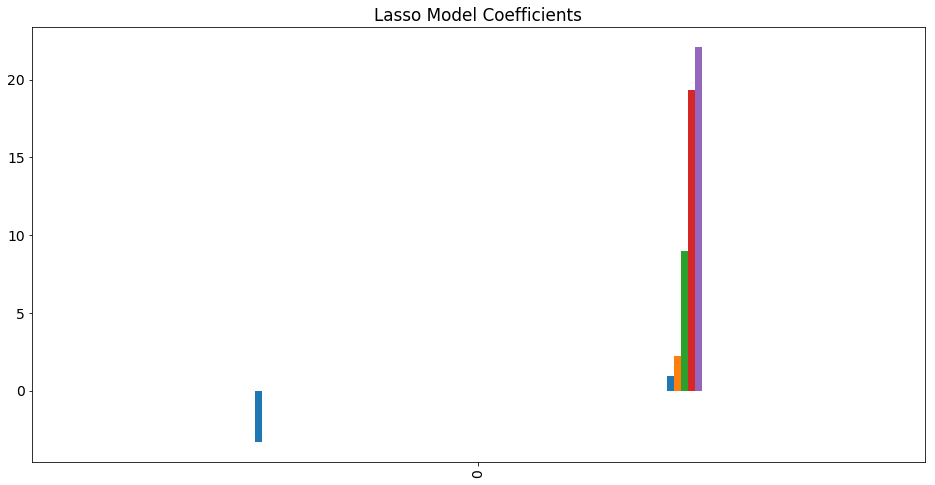

In [90]:
## training the model
from sklearn.linear_model import Lasso


lassoReg = Lasso(alpha=.5, normalize=True)

lassoReg.fit(X_train,y_train)

y_pred = lassoReg.predict(X_test)

#calculating mse

print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred))/ y_test.outcome.std())



coef = pd.DataFrame(data=lassoReg.coef_, index=X_train.columns )
model_coef = coef.sort_values(by=0).T

model_coef.plot(kind='bar', title='Lasso Model Coefficients', legend=False, figsize=(16,8))

MSE: 3140.739320640092
RMSE: 56.04229938751703
0.7811622604632075


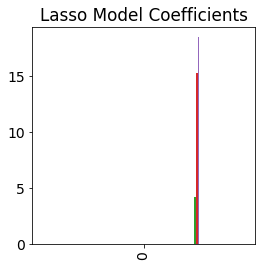

In [88]:
## training the model
from sklearn.linear_model import Lasso


lassoReg = Lasso(alpha=1, normalize=True)

lassoReg.fit(X_train,y_train)

y_pred = lassoReg.predict(X_test)

#calculating mse

print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred))/ y_test.outcome.std())



coef = pd.DataFrame(data=lassoReg.coef_, index=X_train.columns )
model_coef = coef.sort_values(by=0).T

model_coef.plot(kind='bar', title='Lasso Model Coefficients', legend=False, figsize=(4,4))

**Important Points:**
* It uses L1 regularization technique (will be discussed later in this article)
* It is generally used when we have more number of features, because it automatically does feature selection.

Finally to end this meditation, let’s summarize what we have learnt so far

1. Cost function of Ridge and Lasso regression and importance of regularization term.
2. Went through some examples using simple data-sets to understand Linear regression as a limiting case for both Lasso and Ridge regression.
Understood why Lasso regression can lead to feature selection whereas Ridge can only shrink coefficients close to zero.